# Cirrhosis stage prediction

Kaggle username: Hongpeng Zhang

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

### Reading data

In [2]:
df = pd.read_csv('../CA4/data/train.csv', sep=',', index_col=0)

In [3]:
df.head()

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
index                                                                           
0         980      D  D-penicillamine  18713   F       N            Y       Y   
1        1455      C          Placebo  12398   F       N            Y       N   
2         216      D          Placebo  19246   F       Y            Y       Y   
3        2216      C          Placebo  19221   F       N            Y       Y   
4        1701      C  D-penicillamine  11485   F       N            N       N   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos     SGOT  \
index                                                                     
0         N        6.7        561.0    5.610   154.5    1468.5  192.975   
1         N        1.3        456.0    5.280   145.5    2433.0  106.500   
2         N       24.5       1638.0    5.025   349.5    5610.0  220.875   
3         N        0.7        201.6    3.208     8.8     968.0   58.280   
4         N        1.1        403.2    4.488    57.6     987.6  100.800   

       Tryglicerides  Platelets  Prothrombin  Stage  
index                                                
0              150.0      399.0        16.65      4  
1              253.5      382.5        14.25      4  
2              648.0      598.5        22.80      4  
3               46.4      247.2         7.60      2  
4              129.6      290.4        11.64      3

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         200 non-null    int64  
 1   Status         200 non-null    object 
 2   Drug           200 non-null    object 
 3   Age            200 non-null    int64  
 4   Sex            200 non-null    object 
 5   Ascites        200 non-null    object 
 6   Hepatomegaly   200 non-null    object 
 7   Spiders        200 non-null    object 
 8   Edema          200 non-null    object 
 9   Bilirubin      200 non-null    float64
 10  Cholesterol    184 non-null    float64
 11  Albumin        200 non-null    float64
 12  Copper         199 non-null    float64
 13  Alk_Phos       200 non-null    float64
 14  SGOT           200 non-null    float64
 15  Tryglicerides  184 non-null    float64
 16  Platelets      196 non-null    float64
 17  Prothrombin    200 non-null    float64
 18  Stage     

### Data exploration and visualisation

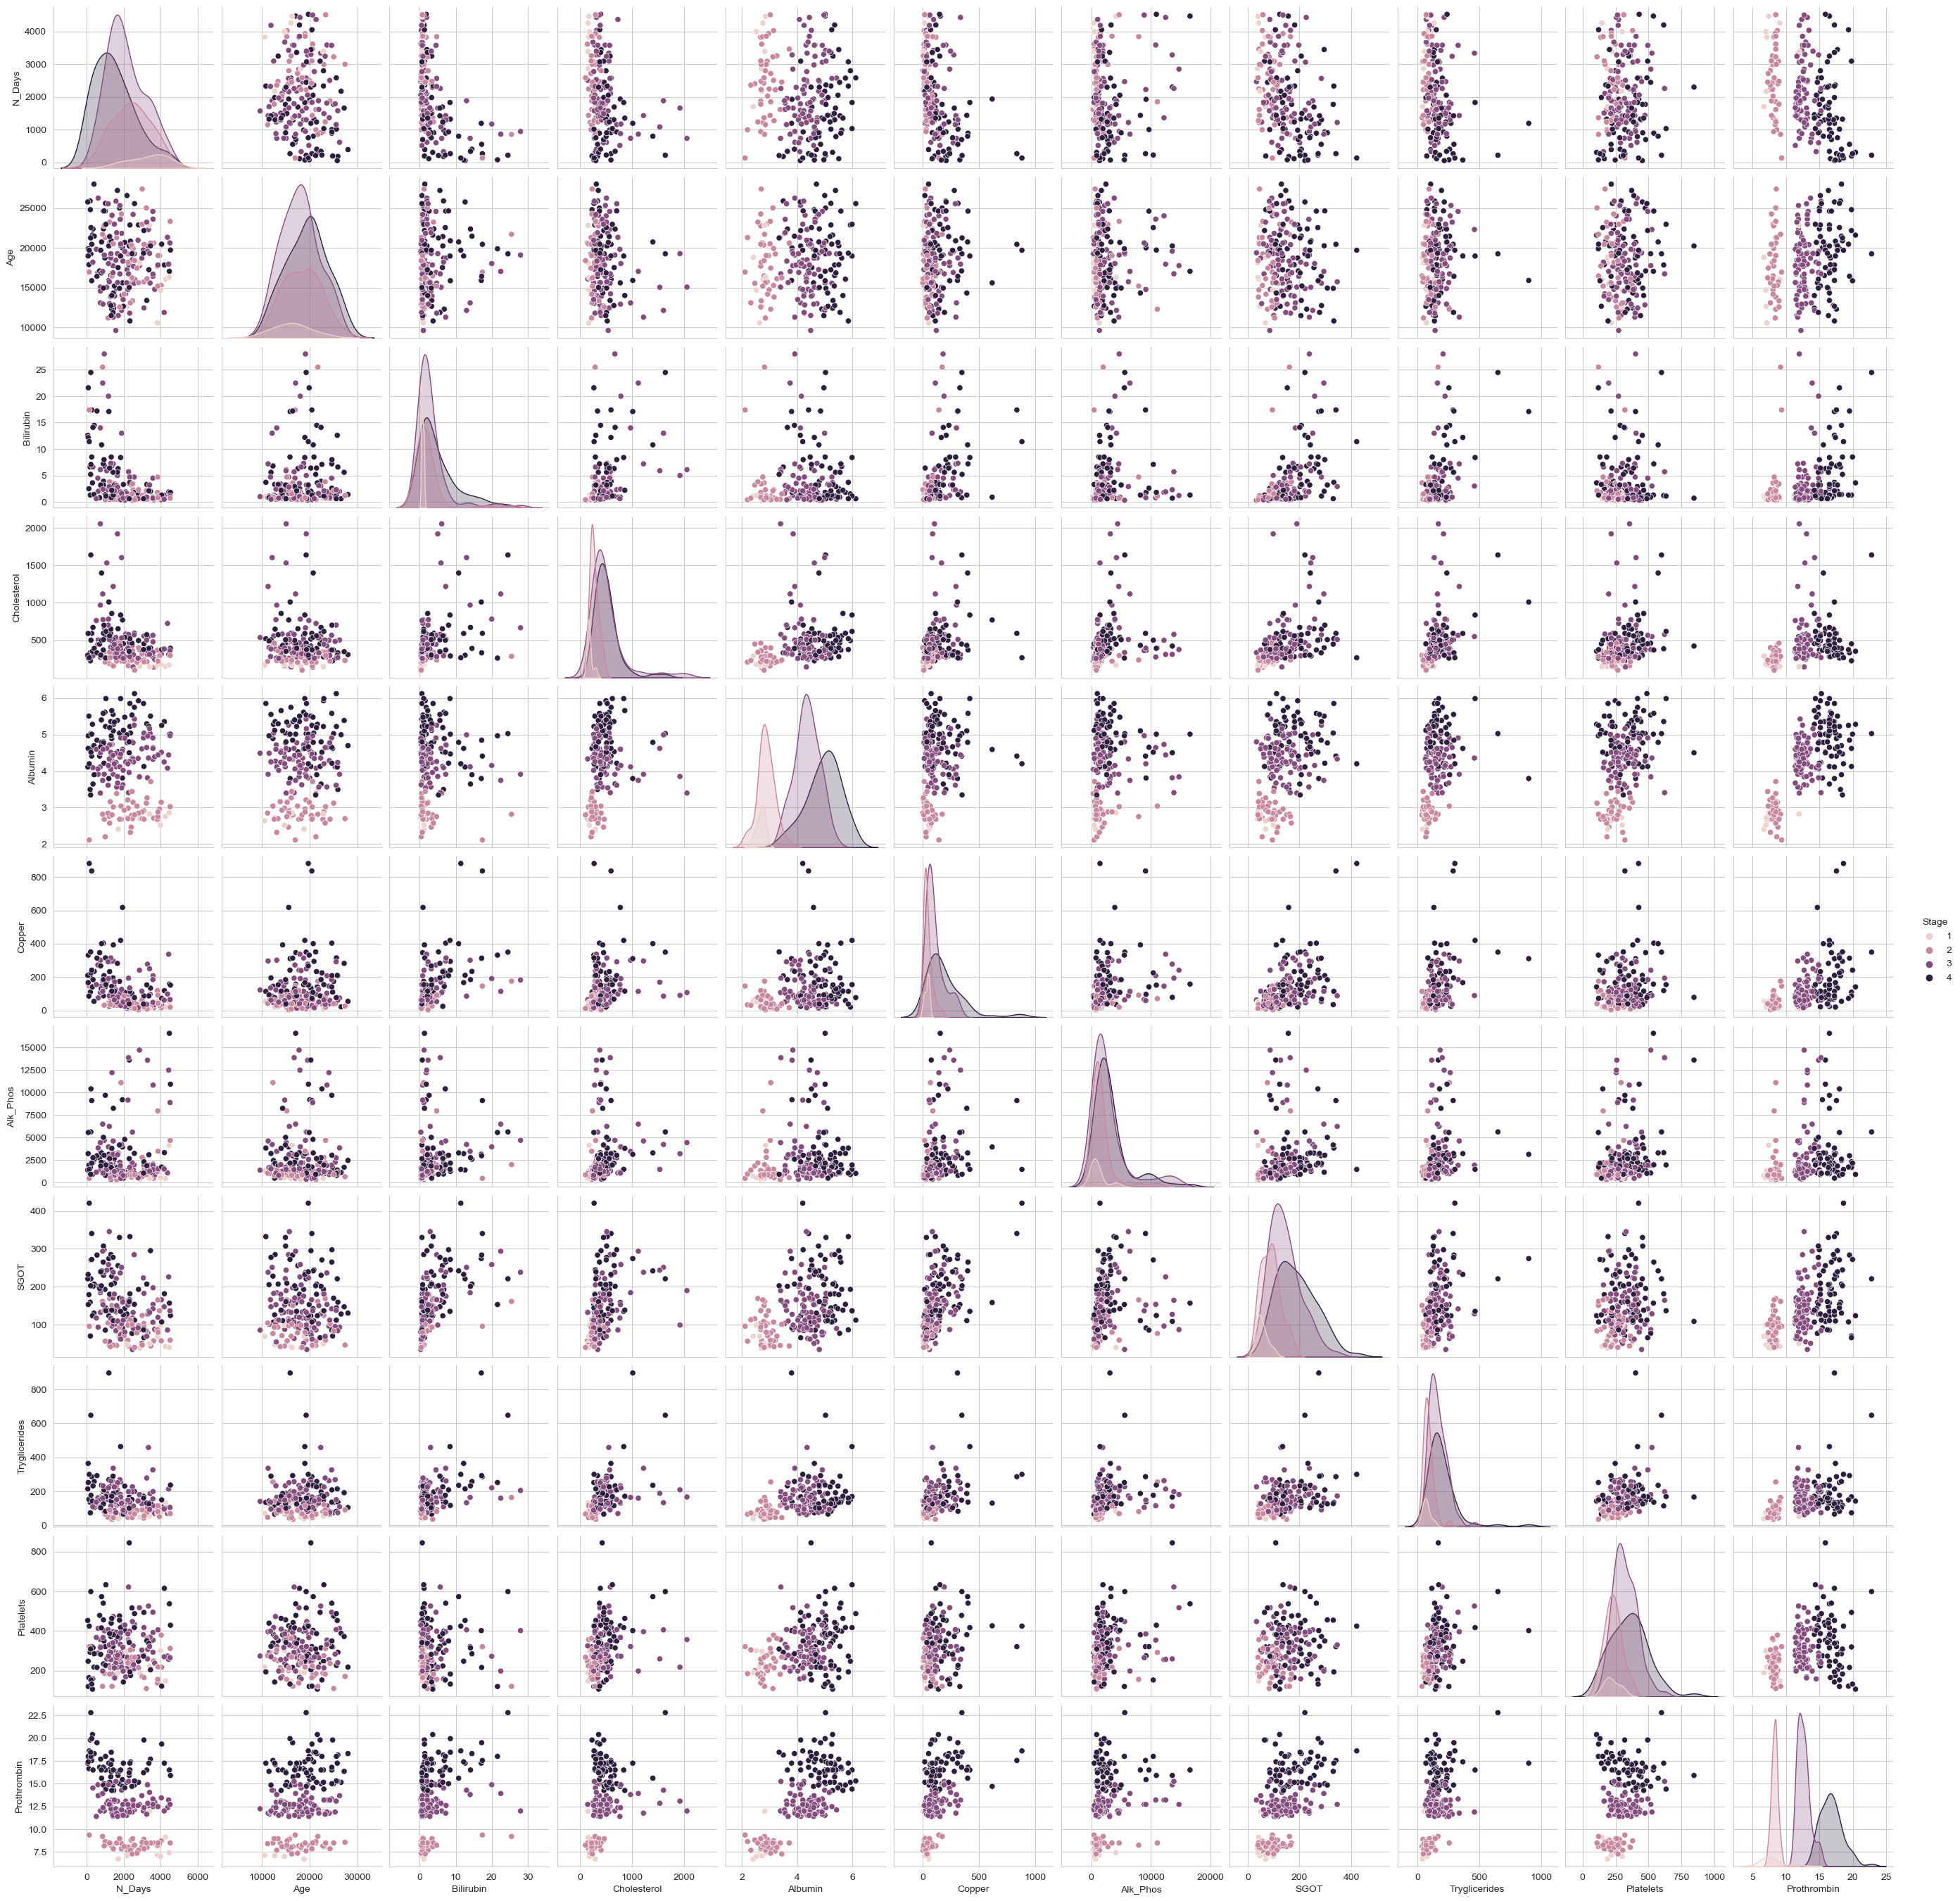

In [5]:
sns.pairplot(df, hue='Stage')

In [6]:
df.isnull().sum(axis=0)

N_Days            0
Status            0
Drug              0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol      16
Albumin           0
Copper            1
Alk_Phos          0
SGOT              0
Tryglicerides    16
Platelets         4
Prothrombin       0
Stage             0
dtype: int64

In [7]:
df[df['Cholesterol'].isnull() & df['Tryglicerides'].isnull()]

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
index                                                                           
19       2504      C  D-penicillamine  19916   F       N            N       Y   
24       2574      C  D-penicillamine  19237   F       N            N       N   
31       1350      D  D-penicillamine  12285   F       N            Y       N   
39       4467      C  D-penicillamine  17046   F       N            N       N   
58       4025      C          Placebo  15265   F       N            N       N   
61       2170      C  D-penicillamine  12636   F       N            N       N   
63       1000      D  D-penicillamine  24621   F       N            Y       N   
79        130      D          Placebo  16944   F       Y            Y       Y   
100      2171      C  D-penicillamine  26580   F       N            N       N   
103      3458      C  D-penicillamine  20600   F       N            N       N   
120      1492      D  D-penicillamine  15198   F       N            Y       Y   
145      2580      C  D-penicillamine  25569   F       N            N       N   
150      3222      D  D-penicillamine  25023   F       Y            Y       N   
169      3850      C  D-penicillamine  17841   F       N            N       N   
184       207      D          Placebo  21247   F       N            Y       N   
186       264      D          Placebo  15857   F       N            Y       Y   

      Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos     SGOT  \
index                                                                     
19        N        2.3          NaN    3.144    19.2    1462.4  106.640   
24        N        0.5          NaN    5.424    37.2     940.8   89.280   
31        N        6.8          NaN    4.890   144.0    1822.5  227.850   
39        N        1.3          NaN    5.010   157.5   16569.9  156.735   
58        N        0.6          NaN    3.144    15.2    1460.8   57.040   
61        N        0.5          NaN    2.723    20.3     627.9   46.655   
63        N        2.6          NaN    4.650   141.0    9684.3   85.140   
79        Y       17.4          NaN    2.112   145.6     447.2   95.480   
100       S        0.6          NaN    4.995    21.0    1099.5  127.875   
103       N        0.6          NaN    3.712    16.0     532.8   43.400   
120       N        3.2          NaN    5.340   115.5    2685.0  209.250   
145       N        0.6          NaN    6.120    76.5     997.5  111.600   
150       N        2.1          NaN    3.120    40.0     869.6   83.080   
169       N        1.0          NaN    4.440    39.6    1509.6  119.040   
184       N        5.2          NaN    3.345   351.0     901.5  202.500   
186       S        8.5          NaN    5.010   241.5    2142.0  272.025   

       Tryglicerides  Platelets  Prothrombin  Stage  
index                                                
19               NaN      261.6         8.16      2  
24               NaN      433.2        12.12      3  
31               NaN      339.0        17.55      4  
39               NaN      537.0        16.50      4  
58               NaN      379.2         8.72      2  
61               NaN      296.1         7.07      1  
63               NaN      321.0        16.50      4  
79               NaN      320.8         9.36      2  
100              NaN      388.5        15.15      4  
103              NaN      212.0         8.48      2  
120              NaN      223.5        15.15      4  
145              NaN      487.5        15.30      4  
150              NaN      109.6         8.48      2  
169              NaN      405.6        12.48      3  
184              NaN      309.0        18.45      4  
186              NaN      132.0        19.95      4

We can see that both 'Cholesterol' and 'Tryglicerides' has 16 missing values, which happens in 16 samples at the same time. Because we have only 200 samples with 18 features in the dataset, a quite small training set with two many features, it is better to drop the two features with two many missing values in same samples.

### Data cleaning

In [8]:
df = df.drop(columns=['Cholesterol', 'Tryglicerides'])

In [9]:
df_null = df.isnull().sum()
df_null[df_null != 0]

Copper       1
Platelets    4
dtype: int64

In [10]:
col_null = df_null[df_null != 0].index

<AxesSubplot:>

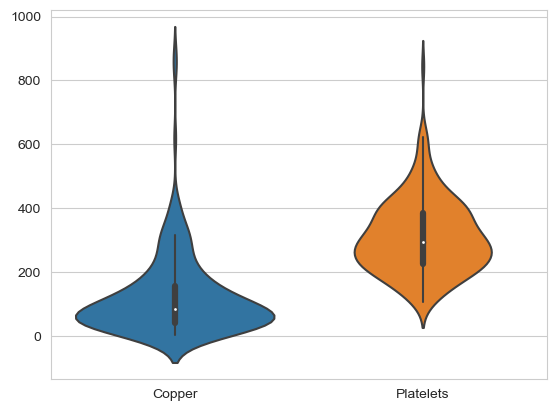

In [11]:
sns.violinplot(df[df_null[df_null != 0].index])

In [12]:
df[col_null].describe()

Copper   Platelets
count  199.000000  196.000000
mean   121.970854  310.597449
std    125.321389  115.841306
min      3.200000  106.500000
25%     41.200000  223.500000
50%     82.800000  292.650000
75%    154.500000  385.650000
max    882.000000  844.500000

From the violinplot we can see the distribution of the columns with missing values are extremely skewed, so it's better to use column median to impute the missing values than means.

In [13]:
# impute missing values using the column median
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df[col_null].values)
df.loc[:, col_null] = imr.transform(df[col_null].values)

### Data exploration after cleaning

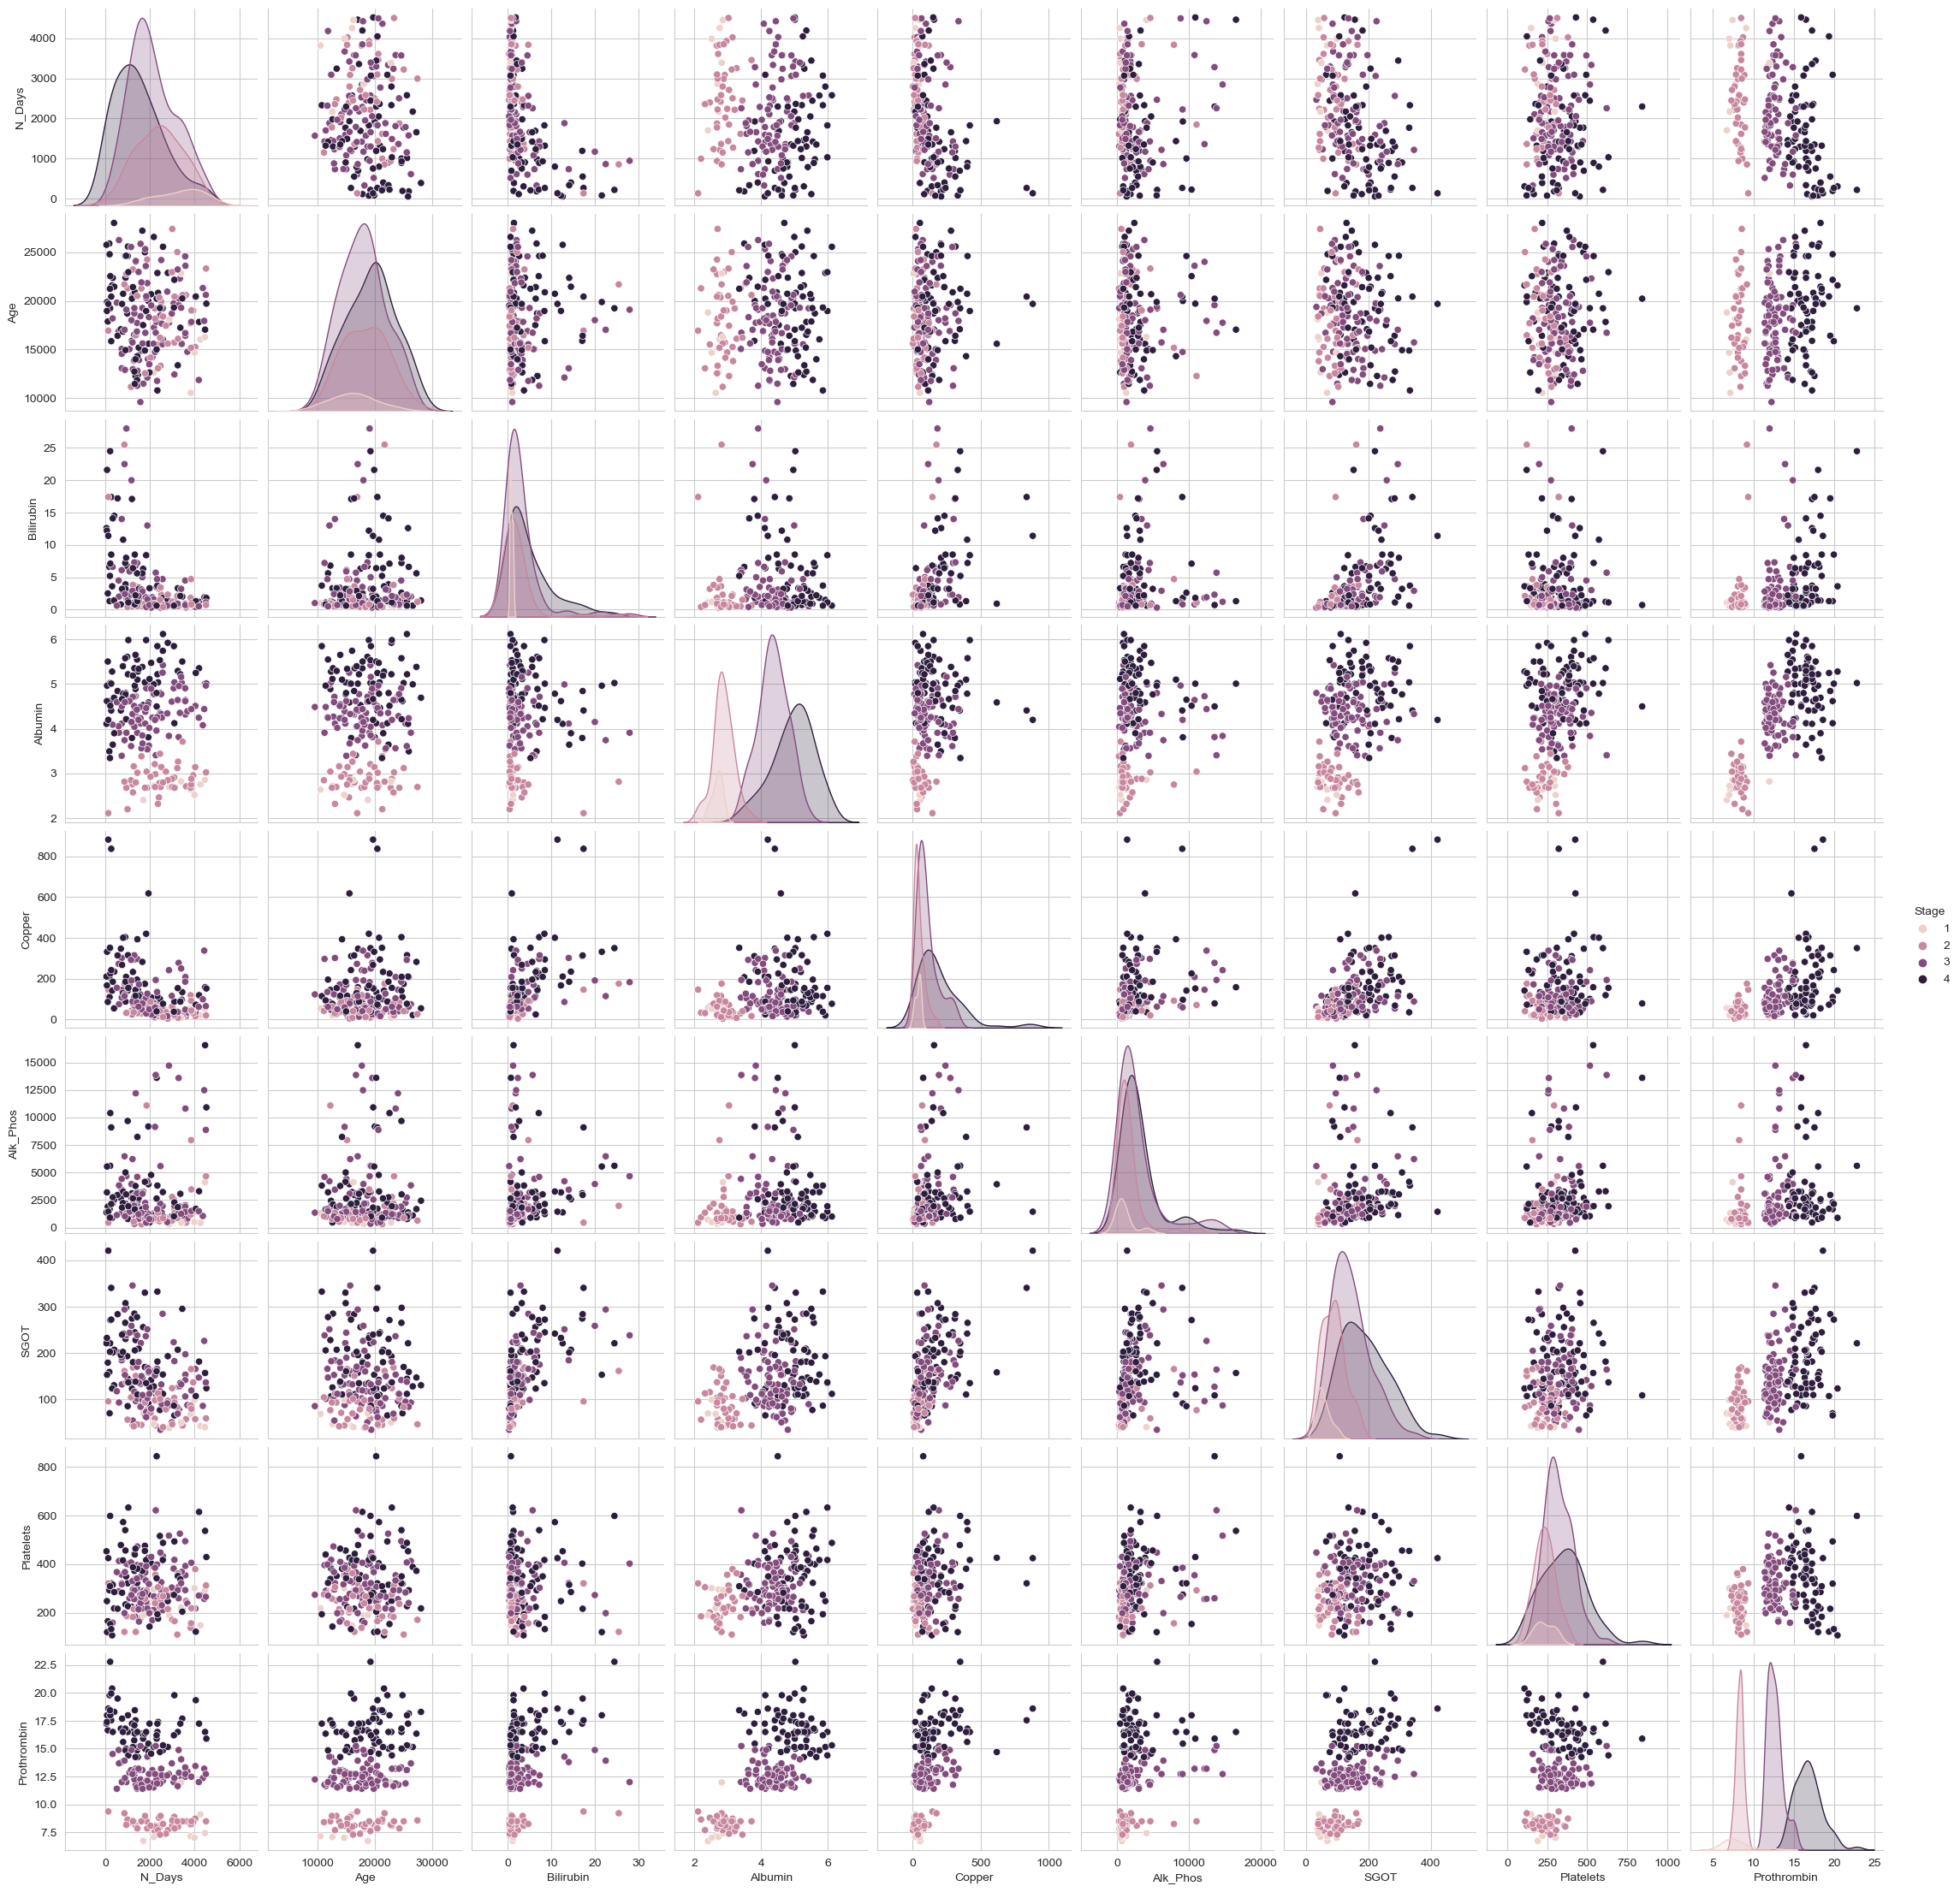

In [14]:
sns.pairplot(df, hue='Stage')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N_Days        200 non-null    int64  
 1   Status        200 non-null    object 
 2   Drug          200 non-null    object 
 3   Age           200 non-null    int64  
 4   Sex           200 non-null    object 
 5   Ascites       200 non-null    object 
 6   Hepatomegaly  200 non-null    object 
 7   Spiders       200 non-null    object 
 8   Edema         200 non-null    object 
 9   Bilirubin     200 non-null    float64
 10  Albumin       200 non-null    float64
 11  Copper        200 non-null    float64
 12  Alk_Phos      200 non-null    float64
 13  SGOT          200 non-null    float64
 14  Platelets     200 non-null    float64
 15  Prothrombin   200 non-null    float64
 16  Stage         200 non-null    int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 28.1+ KB


### Data preprocessing

We have several categorical feature columns.
'Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', are all nominal features, so we need to encode these columns.

In [16]:
df.Stage.value_counts()

3    81
4    70
2    41
1     8
Name: Stage, dtype: int64

We can see the samples on the 4 label classes are not balanced in the raw data. Therefore we should set "class_weight=‘balanced’" in classifiers.

In [17]:
df_le = pd.get_dummies(df, drop_first=True)

In [18]:
column_list = list(df_le.columns)
column_list.remove('Stage')
column_list.append('Stage')

In [19]:
df_le = df_le.reindex(columns=column_list)

#### Train test split

In [20]:
X = df_le.iloc[:,:-1].values
y = df_le.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

#### Scaling

In [21]:
miu = np.mean(X_train, axis=0)
sigma = np.std(X_train, axis=0, ddof=1)
X_train_sc = (X_train - miu) / sigma
X_test_sc = (X_test - miu) / sigma

### Modelling

We have too many features for the dataset, should use PCA to reduce features.

In [22]:
pca = PCA(n_components=10)
pca.fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.60940178, 0.95058852, 0.99898514, 0.99950372, 0.9998825 ,
       0.99999914, 0.99999969, 0.99999995, 0.99999996, 0.99999997])

We could see, when we set components = 6, we already a cumulative explained variance ratio over 99.9%, so 6 components is enough.

#### Data pipeline with kernel

In [23]:
pipe_svc = make_pipeline(StandardScaler(),    # Scaling of input features
                        PCA(n_components=6), # Compression into principal components
                        SVC(random_state=1, class_weight='balanced')) # Fit Support Vector Classifier with standard parameters

In [24]:
param_range  = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0] # For regularization parameter C.
param_range2 = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]         # For scaling parameter gamma og rbf-kernel.
param_grid   = [{'svc__C': param_range, 'svc__kernel': ['linear']},
                {'svc__C': param_range, 'svc__gamma': param_range2, 'svc__kernel': ['rbf']}]

In [25]:
gs_SVC = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='f1_macro',
                  cv=5,
                  n_jobs=-1)
f1_scores = cross_val_score(gs_SVC, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

In [26]:
f1_scores

array([0.6026936 , 0.73986014, 0.64457418, 0.64945055, 0.60993789])

In [27]:
gs_SVC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=6)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=1))]),
             n_jobs=-1,
             param_grid=[{'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__kernel': ['linear']},
                         {'svc__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0,
                                     1000.0],
                          'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                         100.0],
                          'svc__kernel': ['rbf']}],
             scoring='f1_macro')

In [28]:
gs_SVC.best_params_

{'svc__C': 100.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

In [29]:
gs_SVC.best_score_

0.7488089655915743

In [30]:
gs_SVC_best = gs_SVC.best_estimator_
gs_SVC_best.fit(X_train, y_train)
y_predict = gs_SVC_best.predict(X_test)
report = classification_report(y_test, y_predict, output_dict=True)
df_report = pd.DataFrame(report)

In [31]:
df_report.T

precision    recall  f1-score  support
1              1.000000  1.000000  1.000000    2.000
2              1.000000  0.875000  0.933333    8.000
3              0.882353  0.937500  0.909091   16.000
4              0.928571  0.928571  0.928571   14.000
accuracy       0.925000  0.925000  0.925000    0.925
macro avg      0.952731  0.935268  0.942749   40.000
weighted avg   0.927941  0.925000  0.925303   40.000

#### Data pipeline with regularization

In [32]:
# Simple train data pipeline
pipe_lr = make_pipeline(StandardScaler(),    # Scaling of input features
                        PCA(n_components=6), # Compression into principal components
                        LR(random_state=1, class_weight='balanced',
                           solver='liblinear')) # Fit Logistic Regression with standard parameters

In [33]:
c_range = np.arange(-8, 11)
param_range  = [10.**c for c in c_range] # For regularization parameter C.
param_grid   = [{'logisticregression__C': param_range, 'logisticregression__penalty': ['l1', 'l2']}]

In [34]:
gs_lr = GridSearchCV(estimator=pipe_lr,
                  param_grid=param_grid,
                  scoring='f1_macro',
                  cv=5,
                  n_jobs=-1, error_score=0)
f1_scores = cross_val_score(gs_lr, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

In [35]:
f1_scores

array([0.62253487, 0.62470862, 0.66380495, 0.60338346, 0.60993789])

In [36]:
gs_lr.fit(X_train, y_train)

C:\Users\uranu\anaconda3\envs\Basic_analysis\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5, error_score=0,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=6)),
                                       ('logisticregression',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=1,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'logisticregression__C': [1e-08, 1e-07, 1e-06, 1e-05,
                                                    0.0001, 0.001, 0.01, 0.1,
                                                    1.0, 10.0, 100.0, 1000.0,
                                                    10000.0, 100000.0,
                                                    1000000.0, 10000000.0,
                                                    100000000.0, 1000000000.0,
                                                    10000000000.0],
                          'logisticregression__penalty': ['l1', 'l2']}],
             scoring='f1_macro')

In [37]:
gs_lr.best_params_

{'logisticregression__C': 100.0, 'logisticregression__penalty': 'l1'}

In [38]:
gs_lr.best_score_

0.6670775674236773

In [39]:
gs_lr_best = gs_lr.best_estimator_
gs_lr_best.fit(X_train, y_train)
y_predict = gs_lr_best.predict(X_test)
report = classification_report(y_test, y_predict, output_dict=True)
df_report = pd.DataFrame(report)

C:\Users\uranu\anaconda3\envs\Basic_analysis\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
df_report.T

precision    recall  f1-score  support
1              1.000000  1.000000  1.000000      2.0
2              1.000000  0.875000  0.933333      8.0
3              0.833333  0.937500  0.882353     16.0
4              0.923077  0.857143  0.888889     14.0
accuracy       0.900000  0.900000  0.900000      0.9
macro avg      0.939103  0.917411  0.926144     40.0
weighted avg   0.906410  0.900000  0.900719     40.0

#### Other models used for Kaggle submission

I tried several other models, and Decision tree performed best for this dataset.

In [41]:
# Decision tree
pipe_dt_no = make_pipeline(
                        DT(random_state=1)) # Fit Decision Tree with standard parameters

In [42]:
param_range  = np.arange(1, 31) # For regularization parameter max_depth.
param_grid   = [{'decisiontreeclassifier__max_depth': param_range, 'decisiontreeclassifier__criterion': ['gini', 'entropy', 'log_loss']}] # For different criterions.

In [43]:
gs_dt_no = GridSearchCV(estimator=pipe_dt_no,
                  param_grid=param_grid,
                  scoring='f1_macro',
                  cv=5,
                  n_jobs=-1)
f1_scores = cross_val_score(gs_dt_no, X_train, y_train, scoring='f1_macro', cv=5, n_jobs=-1)

In [44]:
f1_scores

array([0.7849359 , 0.59685315, 0.71216931, 0.65747126, 0.60539279])

In [45]:
gs_dt_no.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=1))]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy',
                                                                'log_loss'],
                          'decisiontreeclassifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])}],
             scoring='f1_macro')

In [46]:
gs_dt_no.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 5}

In [47]:
gs_dt_no.best_score_

0.6943704772535827

In [48]:
gs_dt_no_best = gs_dt_no.best_estimator_
gs_dt_no_best.fit(X_train, y_train)
y_predict = gs_dt_no_best.predict(X_test)
report = classification_report(y_test, y_predict, output_dict=True)
df_report = pd.DataFrame(report)

In [49]:
gs_dt_no_best

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, random_state=1))])

In [50]:
df_report.T

precision    recall  f1-score  support
1              1.000000  1.000000  1.000000    2.000
2              1.000000  1.000000  1.000000    8.000
3              0.941176  1.000000  0.969697   16.000
4              1.000000  0.928571  0.962963   14.000
accuracy       0.975000  0.975000  0.975000    0.975
macro avg      0.985294  0.982143  0.983165   40.000
weighted avg   0.976471  0.975000  0.974916   40.000

### Final Evaluation and confusion matrix

Train the models with the whole train data

In [51]:
df_test_kaggle = pd.read_csv('../CA4/data/test.csv', sep=',', index_col=0)

In [52]:
df_test_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 108
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         109 non-null    int64  
 1   Status         109 non-null    object 
 2   Drug           109 non-null    object 
 3   Age            109 non-null    int64  
 4   Sex            109 non-null    object 
 5   Ascites        109 non-null    object 
 6   Hepatomegaly   109 non-null    object 
 7   Spiders        109 non-null    object 
 8   Edema          109 non-null    object 
 9   Bilirubin      109 non-null    float64
 10  Cholesterol    100 non-null    float64
 11  Albumin        109 non-null    float64
 12  Copper         108 non-null    float64
 13  Alk_Phos       109 non-null    float64
 14  SGOT           109 non-null    float64
 15  Tryglicerides  98 non-null     float64
 16  Platelets      109 non-null    float64
 17  Prothrombin    109 non-null    float64
dtypes: float64

We can see there are some null values in the test data, so we shall fill them as we did to the train data.

In [53]:
# Get the columns with null values.
df_test_kaggle = df_test_kaggle.drop(columns=['Cholesterol', 'Tryglicerides'])
df_test_kaggle_null = df_test_kaggle.isnull().sum()
df_test_kaggle_null[df_test_kaggle_null != 0]
col_test_null = df_test_kaggle_null[df_test_kaggle_null != 0].index

In [54]:
# impute missing values using the column median
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df_test_kaggle[col_test_null].values)
df_test_kaggle.loc[:, col_test_null] = imr.transform(df_test_kaggle[col_test_null].values)

As we did before, we need to encode nominal features in the test data.

In [55]:
df_test_kaggle = pd.get_dummies(df_test_kaggle, drop_first=True)

In [56]:
# Train SVC model
y_kaggle_SVC = gs_SVC_best.predict(df_test_kaggle.values)

In [57]:
# Train LogisticRegression model
y_kaggle_lr = gs_lr_best.predict(df_test_kaggle.values)

In [58]:
# Train Decision Tree model
y_kaggle_dt_no = gs_dt_no_best.predict(df_test_kaggle.values)

### Kaggle submission

In [59]:
df_SVC_submission = pd.DataFrame(y_kaggle_SVC, columns=['Stage'])
df_SVC_submission.index.name = 'index'
df_SVC_submission.to_csv('SVC2.csv', sep=',')

In [60]:
df_lr_submission = pd.DataFrame(y_kaggle_lr, columns=['Stage'])
df_lr_submission.index.name = 'index'
df_lr_submission.to_csv('lr2.csv', sep=',')

In [61]:
df_dt_no_submission = pd.DataFrame(y_kaggle_dt_no, columns=['Stage'])
df_dt_no_submission.index.name = 'index'
df_dt_no_submission.to_csv('dt_no_2.csv', sep=',')

Kaggle shows the score of SVC is 0.71871, LogisticRegression is 0.73039, and Decision Tree is 0.92989.

#### ROC Curve for binary classificaion problem

Plot ROC curve for LogisticRegression model

In [62]:
# The possibility of LogisticRegression on X_test.
probas = gs_lr_best.predict_proba(X_test)

In [63]:
# Use OVR strategy to turn 4 classed in to binary classification problem, get fpr and tpr for each class.
fpr_list = []
tpr_list = []
threshold_list = []
for i in range(1,5):
    y = np.where(y_test == i, y_test, 0)
    fpr, tpr, thresholds = roc_curve(y, probas[:, i - 1], pos_label=i)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    threshold_list.append(thresholds)

Text(0, 0.5, 'true positive rate')

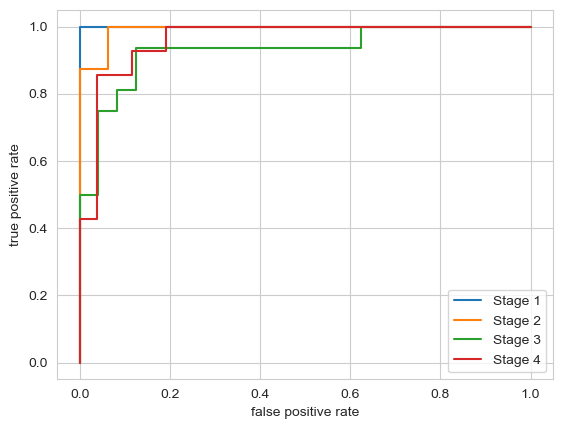

In [64]:
# Plot the ROC curve
for i in range(1,5):
    plt.plot(fpr_list[i - 1], tpr_list[i - 1], label=f'Stage {i}')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')